<br>
<br>
<center> <font size = 6> Option Pricing (Black Scholes, Binomial Model, and Monte Carlo Simulation)
         </font> 
</center>
<br>
<br>
<center> <font size = 3> Last Updated: 19/02-2023 </font> </center>

This notebook contains various methods for pricing options. It also contains exercises on the topic "Options" for Advanced Financial Engineering (42108) at DTU.

<h1><center>IMPLEMENTATION</center></h1>

## Derivation of the Black-Scholes equation

To derive the governing equation, we use the classical delta-hedging argument. I used the following video to make the derivation: https://www.youtube.com/watch?v=NHvQ5CSSgw0.

Consider a portfolio $P$ which consists of one option $V_{K}(t,T)$ on the asset $S$ and a short position of $\Delta$ times $S$. 

$$
P = V_{K}(t, T) - \Delta S
$$

Then we want to find the change in $P$ as a response to a change in $S$.

$$
\frac{\partial P}{\partial S} = \frac{\partial V_{K}(t, T)}{\partial S} - \Delta \ \ \ \leftrightarrow \ \ \ \partial P = \partial V_{K}(t, T) - \Delta \partial S
$$

The instantaneous change in $S$ (i.e., $\partial S$) is governed by a geometric Brownian motion (GBM).

$$
dS = \mu S dt + \sigma S dW
$$

The process $\partial V_{K}(t, T)$ is a function of the stochastic process $S$. Hence, we can apply Itô's lemma to find the expression.

\begin{align}
dV_{K}(t, T) &= \frac{\partial V_{K}(t, T)}{ \partial t} dt + \frac{\partial V_{K}(t, T)}{\partial S} dS + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} dS^{2} \\
&= \frac{\partial V_{K}(t, T)}{ \partial t} dt + \frac{\partial V_{K}(t, T)}{\partial S} dS + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} (\mu S dt + \sigma S dW)^{2} \\
&= \frac{\partial V_{K}(t, T)}{ \partial t} dt + \frac{\partial V_{K}(t, T)}{\partial S} dS + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} (\mu^{2} S^{2} dt^{2} + \sigma^{2} S^{2} dW^{2} + 2 \mu \sigma S^{2} dt dW) \\
&= \frac{\partial V_{K}(t, T)}{ \partial t} dt + \frac{\partial V_{K}(t, T)}{\partial S} dS + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} \sigma^{2} S^{2} dt\\
\end{align}

Then we substitute this back into the portfolio sensitivity.

\begin{align}
\partial P &= \partial V_{K}(t, T) - \Delta \partial S \\
&= \frac{\partial V_{K}(t, T)}{ \partial t} dt + \frac{\partial V_{K}(t, T)}{\partial S} dS + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} \sigma^{2} S^{2} dt - \Delta \partial S \\
&= (\frac{\partial V_{K}(t, T)}{ \partial t} + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} \sigma^{2} S^{2}) dt + (\frac{\partial V_{K}(t, T)}{\partial S} - \Delta) dS
\end{align}

If we let $\Delta = \frac{\partial V_{K}(t, T)}{\partial S}$, then the stochastic term disappears. Therefore, the portfolio $P$ is risk-free. Hence, it should grow with the risk-free rate.

$$\frac{\partial P}{\partial t} = r P = r (V_{K}(t, T) - \Delta S)$$

We can rephrase this.

$$
d P = r P = r (V_{K}(t, T) - \Delta S) dt
$$

We equate this with the portfolio sensitivity.

$$
r (V_{K}(t, T) - \frac{\partial V_{K}(t, T)}{\partial S} S) dt = (\frac{\partial V_{K}(t, T)}{ \partial t} + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} \sigma^{2} S^{2}) dt
$$

Then by rewriting it, we can get the equation.

\begin{align}
r (V_{K}(t, T) - \frac{\partial V_{K}(t, T)}{\partial S} S) dt &= (\frac{\partial V_{K}(t, T)}{ \partial t} + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} \sigma^{2} S^{2}) dt \\
r V_{K}(t, T) - r \frac{\partial V_{K}(t, T)}{\partial S} S &= \frac{\partial V_{K}(t, T)}{ \partial t} + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} \sigma^{2} S^{2} \\
\frac{\partial V_{K}(t, T)}{ \partial t} + \frac{1}{2} \frac{\partial^{2} V_{K}(t, T)}{\partial S^{2}} \sigma^{2} S^{2} + r \frac{\partial V_{K}(t, T)}{\partial S} S  - r V_{K}(t, T) &= 0 \\
\end{align}

The last is known as the Black-Scholes equation.

## Solution to the Black-Scholes equation

It turns out that we can solve the BS equation with the following boundary conditions. Let $V_{K}(t, T)$ be replaced by $C(S, T)$, where $S$ is the stock price, and $T$ it the expiration time.

\begin{align}
C(0, T) &= 0 \ \ \forall t \\
C(S, t) &= S - K \ \ \text{as} \ S \rightarrow \infty \\
C(S, T) &= \max\{S-K, 0\}
\end{align}

Let N be the CDF of the standard normal distribution. Then the solution to the Black-Scholes equation (for a call option) is

$$
C_{K}(S_{t}, T) = N(d_{1}) S_{t} - N(d_{2}) K \exp\{-r(T-t)\} 
$$

where

\begin{align}
d_{1} &= \frac{1}{\sigma \sqrt{T - t}} [\ln(\frac{S_{t}}{K}) + (r + \frac{\sigma^{2}}{2})(T - t)] \\
d_{2} &= d_{1} - \sigma \sqrt{T - t}
\end{align}

For the put option the solution is

$$
C_{K}(S_{t}, T) = -N(-d_{1}) S_{t} + N(-d_{2}) K \exp\{-r(T-t)\} 
$$

## Comparison of Analytical Solution and Monte Carlo Estimation

We start by loading the necessary packages.

In [1]:
from tqdm import tqdm
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import norm
import time
import numpy as np
import math
from scipy.stats import norm
import datetime
from queue import Queue
from queue import LifoQueue

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

Then we define the Black-Scholes for respectively call and put options.

In [2]:
def BlackScholes(S_t = 40, K = 45, t = 0, T = 1, sigma = 1, r = 0.05, direction = "Call"):

    d1 = (1/(sigma*np.sqrt(T - t))) * (np.log(S_t/K) + (r + (sigma**2)/2)*(T - t))
    d2 = d1 - sigma*np.sqrt(T - t)
    
    if direction == "Call":  
        return(norm.cdf(d1)*S_t - norm.cdf(d2)*K*np.exp(-r*(T-t)))
    elif direction == "Put":
        return(-norm.cdf(-d1)*S_t + norm.cdf(-d2)*K*np.exp(-r*(T-t)))
    else:
        return(np.nan)

Then we implement a general Euler-Maruyama scheme.

In [3]:
# ------------------ EULER-MARUYAMA IMPLEMENTATION ------------------

def SDE_simulation(tN = 100, t0 = 0, f = lambda X_t, t : 0, g = lambda X_t, t : 1, delta_t = 0.001, X_0 = 0, n_sim = 10, plot = False, title = 'Cox-Ingersoll-Ross', verbose = False):

    start = time.time()

    size = math.ceil((tN - t0)/delta_t)
    time_points = [t0] + [delta_t for i in range(0, size)]

    column_names = ['Time'] + ['Simulation {}'.format(i) for i in range(1, n_sim+1)];
    time_array = np.cumsum(time_points);

    # Simulation (for now equal time steps are assumed)
    dWt = norm.ppf(np.random.rand(size + 1,n_sim), loc = 0, scale = math.sqrt(delta_t))

    # Euler Maruyama
    simulation_array = np.zeros((size + 1,n_sim))
    simulation_array[0,:]  = X_0;
    for i in range(0, len(time_points)-1):
        simulation_array[i+1,:] = simulation_array[i,:] + f(simulation_array[i,:], time_array[i]) * time_points[i+1] + g(simulation_array[i,:], time_array[i]) * dWt[i]

    # Then we can make a Pandas data frame
    df = pd.DataFrame(np.column_stack([time_array, simulation_array]));
    df.columns = column_names;

    end = time.time()
    
    if verbose:
        print("\nTime to run simulations: {}s \n".format(end - start))
        print("The output has {} rows and {} columns.".format(df.shape[0], df.shape[1]))
        print("The total number of elements is {}.\n".format(df.shape[0]*df.shape[1]))

    if plot:

        plt.rcParams.update({
            "text.usetex": True,
            "font.family": "Helvetica"
        })

        print("Plotting has started ...\n")
        plt.figure(figsize=(10,6), dpi = 100)
        plt.xlabel('t', fontsize = 14)
        plt.ylabel(r'$X_{t}$', fontsize = 14)
        plt.title(title, fontsize = 18)
        plt.plot(df.iloc[:,0].values, df.iloc[:,1:].values);
        plt.show()

    return(df)

# ------------------ VARIOUS MODELS FROM THE COURSE ------------------

def StandardBrownianMotion(tN = 100, t0 = 0, delta_t = 0.001, B_0 = 0, n_sim = 10, plot = False, title = r'\textbf{Standard Brownian Motion (i.e., $\{B_{t}\}_{t \geq t_{0}}$)}'):
    return SDE_simulation(tN = tN, t0 = t0, delta_t = 0.001, X_0 = B_0, n_sim = n_sim, plot = plot, title = title)

def GeometricBrownianMotion(r = 0.1, sigma = 0.2, tN = 100, t0 = 0, delta_t = 0.001, X_0 = 0, n_sim = 10, plot = False, title = r'Geometric Brownian Motion'):

    def f(state: float, t: float)->"Drift":
        return(state*r)

    def g(state: float, t: float)->"Diffusion":
        return(state*sigma)

    return SDE_simulation(tN = tN, f = f, g = g, t0 = t0, delta_t = delta_t, X_0 = X_0, n_sim = n_sim, plot = plot, title = title)

def CoxIngersollRoss(lambdA = 0.1, xi = 0.2, gamma = 0.3, tN = 100, t0 = 0, delta_t = 0.001, B_0 = 0, n_sim = 10, plot = False, title = r'Cox-Ingersoll-Ross'):

    def f(state: float, t: float)->"Drift":
        return(lambdA * (xi - state))

    def g(state: float, t: float)->"Diffusion":
        return(gamma * np.sqrt(state))

    return SDE_simulation(tN = tN, f = f, g = g, t0 = t0, delta_t = 0.001, X_0 = B_0, n_sim = n_sim, plot = plot, title = title)

Based on the GBM, we can price call and put options. In order to reason about uncertainty in the option prices, we need to use *Central Limit Theorem* (CLT).

### Implementation of Monte Carlo Estimation of European Options

In [4]:
def monteCarloEuropeanOptions(S_t = 30, K = 40, t = 0, T = 240/365, sigma = 0.30, r = 0.01, direction = "Call", n_sim = 1000, alpha = 0.05):
    
    # Discount factor
    discountFactor = np.exp(-r*(T - t))
    
    # Save 1000 simulations at a time (memory purposes)
    reps = math.ceil(n_sim/100)
    n_sim_iteration = math.ceil(n_sim/reps)
    E_CT_FV = np.zeros(reps)
    E_CT_Squared = np.zeros(reps)
    
    for i in tqdm (range(0,reps), desc="Loading…", ascii=False, ncols=75):
    
        simulations = GeometricBrownianMotion(r = r, sigma = sigma, tN = T, t0 = 0, delta_t = 0.0001, X_0 = S_t, n_sim = n_sim_iteration, plot = False, title = r'Geometric Brownian Motion')
        ST = simulations.iloc[-1,1:].values

        if direction == "Call":
            CT = np.maximum(ST - K, 0)
        elif direction == "Put":
            CT = np.maximum(K - ST, 0)
        else:
            return
    
        E_CT_FV[i] = np.mean(CT)
        E_CT_Squared[i] = np.mean(CT**2)
        
    E_CT = np.mean(E_CT_FV * discountFactor)
    SE_E_CT = np.sqrt((np.mean(E_CT_Squared) - np.mean(E_CT_FV)**2)*(discountFactor**2))/np.sqrt(n_sim)
    
    return(E_CT, (norm.ppf(alpha/2)*SE_E_CT + E_CT, E_CT + norm.ppf(1 - alpha/2)*SE_E_CT))


### Pricing European Options (Comparison)

In [5]:
S = 101.15
K = 98.01
vol = 0.0991
r = 0.01
N = 10
M = 1000
T = ((datetime.date(2022,3,17) - datetime.date(2022,1,17)).days + 1)/365

In [61]:
Analytical_Call = BlackScholes(S_t = S, K = K, t = 0, T = T, sigma = vol, r = r, direction = "Call")
MC_Call, MC_CI_Call = monteCarloEuropeanOptions(S_t = S, K = K, t = 0, T = T, sigma = vol, r = r, direction = "Call", n_sim = 1000)

Loading…: 100%|████████████████████████████| 10/10 [00:00<00:00, 68.55it/s]


In [62]:
Analytical_Call

3.7599850644771777

In [63]:
MC_Call

3.6592702057926587

In [64]:
MC_CI_Call

(3.442871171601622, 3.8756692399836954)

In [135]:
class BinomialTree:
    
    def __init__(self, S0, U, D, T = 1, periods = 2):
        
        self.U = U;
        self.D = D;
        self.T = T;
        self.dt = T/periods
        self.periods = periods;
        self.Vertices = int((periods+1)*(periods + 2)/2); 
        self.finalVertices = periods + 1;
        self.graph = np.zeros(self.Vertices);
        self.graph[0] = S0;
        self.V = np.copy(self.graph)
        self.constructTree();
        
    def constructTree(self):
        
        for i in range(1, self.Vertices):
            
            level = self.getLevel(i)
            
            if self.isLeftNode(i):
                self.graph[i] = self.graph[i-level]*self.D
                
            elif self.isMiddleNode(i):
                self.graph[i] = self.graph[i-level]*self.D
                
            elif self.isRightNode(i):
                self.graph[i] = self.graph[i-(level+1)]*self.U
                
            else:
                print("An error occured!")
                
    def priceAsianOption(self, K = 105, R = 0.05, avgPeriod = 2, optType = 'Call', verbose = False):
        
        if avgPeriod > self.periods:
            avgPeriod = self.periods;
        
        start = time.time()
        
        # Define payoff
        f = lambda S : np.maximum(S-K,0) if optType == 'Call' else np.maximum(K-S,0)

        # Adjust from annual to step-wise
        R = np.exp(R*(1/self.periods)*self.T) - 1
        
        p = ((R + 1) - self.D)/(self.U - self.D)
        q = (1 - p)
        
        path_dependent = np.zeros(2**(self.periods + 1) - 1)
        path_dependent[0] = self.graph[0]
        
        for i in range(2**(self.periods) - 1):
            path_dependent[self.getLeftChildDependent(i)] = path_dependent[i]*self.D
            path_dependent[self.getRightChildDependent(i)] = path_dependent[i]*self.U

        for i in range(2**(self.periods) - 1, 2**(self.periods+1) - 1):
            path_average = path_dependent[i]
            for j in range(avgPeriod-1):
                path_average += path_dependent[self.getParentDependent(i)]
            path_dependent[i] = f(path_average/self.periods)
            
        for i in np.arange(2**self.periods - 1)[::-1]:
            
            H_u = path_dependent[self.getRightChildDependent(i)]
            H_d = path_dependent[self.getLeftChildDependent(i)]
            
            # Risk-neutral expectation
            path_dependent[i] = (1/(1 + R))*(H_u*p + H_d*q)
        
        V = path_dependent[0]
        end = time.time()
        
        if verbose:
        
            print("It took {}s to price the options with a {}-period binomial model.".format(round(end-start,2), self.periods))
            print("The price of the '{} Option' is: {}{}{}.".format(optType, '\x1b[0;30;43m', round(V, 6), '\x1b[0m'))

        return V;  
        
    def priceAmericanOption(self, K = 105, R = 0.05, optType = 'Call', verbose = False):
        
        start = time.time()
        
        # Define payoff
        f = lambda S : np.maximum(S-K,0) if optType == 'Call' else np.maximum(K-S,0)

        # Adjust from annual to step-wise
        R = np.exp(R*(1/self.periods)*self.T) - 1
        
        p = ((R + 1) - self.D)/(self.U - self.D)
        q = (1 - p)
        
        self.V[self.Vertices - (self.periods+1):] = f(self.graph[self.Vertices - (self.periods+1):])
        
        for i in np.arange(self.Vertices - (self.periods+1))[::-1]:
            
            level = self.getLevel(i)
            H_u = self.V[i + (level + 2)]
            H_d = self.V[i + (level + 1)]
            
            # Risk-neutral expectation
            alternative1 = (1/(1 + R))*(H_u*p + H_d*q)
            alternative2 = f(self.graph[i])
            self.V[i] = max(alternative1, alternative2)
            
        end = time.time()
        
        if verbose:
            print("It took {}s to price the options with a {}-period binomial model.".format(round(end-start,2), self.periods))
            print("The price of the '{} Option' is: {}{}{}.".format(optType, '\x1b[0;30;43m', round(self.V[0], 6), '\x1b[0m'))
        
        return self.V[0];
                
    def priceEuropeanOption(self, K = 105, R = 0.05, optType = 'Call', verbose = False):
        
        start = time.time()
        
        # Define payoff
        f = lambda S, optType : np.maximum(S-K,0) if optType == 'Call' else np.maximum(K-S,0)

        # Adjust from annual to step-wise
        R = np.exp(R*(1/self.periods)*self.T) - 1
        
        p = ((R + 1) - self.D)/(self.U - self.D)
        q = (1 - p)
        
        self.V[self.Vertices - (self.periods+1):] = f(self.graph[self.Vertices - (self.periods+1):], optType)
        
        for i in np.arange(self.Vertices - (self.periods+1))[::-1]:
            
            level = self.getLevel(i)
            H_u = self.V[i + (level + 2)]
            H_d = self.V[i + (level + 1)]
            
            # Risk-neutral expectation
            self.V[i] = (1/(1 + R))*(H_u*p + H_d*q)
            
        end = time.time()
        
        if verbose:
            print("It took {}s to price the options with a {}-period binomial model.".format(round(end-start,2), self.periods))
            print("The price of the '{} Option' is: {}{}{}.".format(optType, '\x1b[0;30;43m', round(self.V[0], 6), '\x1b[0m'))

        return(self.V[0])
    
    def isLeftNode(self, x):
        
        # Root of Gauss' Class Room Formula
        return ((-1 + np.sqrt(1 + 8*x))/2).is_integer()
        
    def isMiddleNode(self, x):
        return (not self.isLeftNode(x) and not self.isRightNode(x))
        
    def isRightNode(self, x):
        
        # Root of Gauss' Class Room Formula
        return self.isLeftNode(x+1)
    
    def getLevel(self, x):
        return int(((-1 + np.sqrt(1 + 8*x))/2))

    def getParent(self, x):
        
        level = self.getLevel(x)
        
        if self.isLeftNode(x):
            return((x-level))
        
        elif self.isMiddleNode(x):
            return((x-(level+1),x-level))
        
        else:
            return((x-(level+1)))
        
    def getLeftChild(self, x):
        
        level = self.getLevel(x)
        return x + (level + 1)
        
    def getRightChild(self, x):
        
        level = self.getLevel(x)
        return x + (level + 2)
    
    def getLevelDependent(self, x):
        return math.ceil(math.log(x+2, 2) - 1)

    def getParentDependent(self, x):  
        return math.floor((x+1)/2) - 1
        
    def getLeftChildDependent(self, x):
        return 2*x + 1;
        
    def getRightChildDependent(self, x): 
        return 2*x + 2;
    
    def generatePaths(self):
        
        n_paths = 2**self.periods;
        paths = np.zeros((self.periods+1, n_paths));
        paths[0,:] = self.graph[0]
        symbolic_trails = np.zeros(self.periods + 1)
        
        # Compute cross product
        possibilities_static = ["u", "d"]
        possibilities_dynamic = ["u", "d"]
        
        if self.periods == 1:
            symbolic_trails = possibilities_static;
        else:
            for k in range(1, self.periods):
                possibilities_dynamic = [i + j for i in possibilities_dynamic for j in possibilities_static];
                symbolic_trails = possibilities_dynamic;
        
        number_of_trails = len(symbolic_trails)
        trail_length = len(symbolic_trails[0])
        trail = np.zeros(trail_length + 1)
        trail[0] = self.graph[0]
        focus_node = 0

        
        for i in tqdm (range(number_of_trails), desc="Loading…", ascii=False, ncols=75):
            for j in range(trail_length):
                focus_node = self.getLeftChild(focus_node) if symbolic_trails[i][j] == "d" else self.getRightChild(focus_node)
                trail[j+1] = self.graph[focus_node]
            paths[:,i] = trail;
            focus_node = 0
            
        return paths

    def displayTree(self, monitor = True):
        
        if self.periods > 15:
            print("The binomial tree is too large...")
            return
        
        t = [i for i in range(self.periods + 1)];
        paths = self.generatePaths()
            
        plt.rcParams.update({
            "text.usetex": True,
            "font.family": "Helvetica"
        })

        print("\nPlotting has started ...\n")
        plt.figure(figsize=(10,6), dpi = 100)
        plt.xlabel('Period', fontsize = 14)
        plt.ylabel(r'$S_{t}$', fontsize = 14)
        plt.title("{}-Step Binomial Model".format(self.periods), fontsize = 18)
        plt.plot(t, paths);
        plt.show()  
        

In [17]:
def binom(n, k):
    try:
        return math.factorial(n) // math.factorial(k) // math.factorial(n - k)
    except ValueError:
        return 0

In [103]:
def EuropeanOptionPricing(S, K = 105, R = 0.05, N = 3, U = 1.236311, D = 0.808858, optType = "Call"):
    
    # Find rate between periods
    R = np.exp(R*(1/N)) - 1
    
    # Compute risk-neutral probabilities
    p = (R - (D - 1))/((U - 1) - (D - 1))
    q = (1 - p)
    
    # Define payoff
    f = lambda S, optType : max(S-K,0) if optType == 'Call' else max(K-S,0)
    
    # Return discounted expectation under risk-neutral measure
    return ((1+R)**(-N))*np.sum([binom(N,k)*(p**k)*(q**(N-k))*f(S*(U**k)*(D**(N-k)), optType) for k in range(0,N+1)])

<h1><center>EXERCISES</center></h1>

## 1) Two-period binomial model (European put option)

In [13]:
Exercise1 = BinomialTree(100, 1.236311, 0.808858, periods = 2)
Exercise1.priceEuropeanOption(K = 105, R = 0.05, optType='Put')

It took 0.0s to price the options with a 2-period binomial model.
The price of the 'Put Option' is: 11.549936.


In [ ]:
EuropeanOptionPricing(100, R=0.05, N = 2, optType='Put')

## 2) Three-period binomial model (European call option)

In [101]:
Exercise2 = BinomialTree(100, 1.155274, 0.865596, periods = 3)
Exercise2.priceEuropeanOption(K = 105, R = 0.04, optType='Call', verbose = True);

It took 0.0s to price the options with a 3-period binomial model.
The price of the 'Call Option' is: 10.150362.


In [102]:
EuropeanOptionPricing(100, K=105, R=0.04, N=3, U=1.155274, D=0.865596, optType='Call');

## 3) Two-period binomial model (American call option)

In [97]:
Exercise3 = BinomialTree(100, 1.236311, 0.808858, periods = 2)
Exercise3.priceAmericanOption(K = 105, R = 0.05, optType='Put', verbose = True);

It took 0.0s to price the options with a 2-period binomial model.
The price of the 'Put Option' is: 12.79801.


## 4) Two-period binomial model (Asian call option)

In [65]:
Exercise4 = BinomialTree(100, 1.236311, 0.808858, periods = 2)
Exercise4.priceAsianOption(K = 105, R = 0.05, avgPeriod = 2, optType = 'Put')

It took 0.0s to price the options with a 2-period binomial model.
The price of the 'Put Option' is: 10.841816.


## 5) Programming exercises

## a)

In [117]:
sigma = 0.3
T = 1
n = 2
U = np.exp(sigma*np.sqrt(T/n))
D = 1/U

In [118]:
ExerciseA = BinomialTree(100, U, D, periods = n)
ExerciseA.priceEuropeanOption(K = 105, R = 0.05, optType='Put')

11.54994255693747

## b)

The price should converge to the Black-Scholes result.

In [119]:
BlackScholes(S_t = 100, K = 105, t = 0, T = 1, sigma = sigma, r = 0.05, direction = "Call")

11.976881462184025

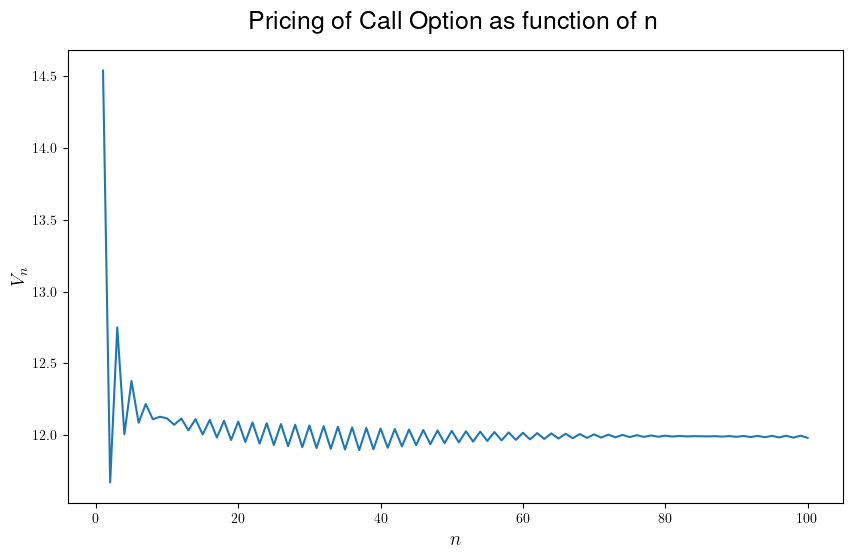

In [120]:
N_max = 100
prices = np.zeros(N_max)

for i in range(1, len(prices)+1):

    n = i
    U = np.exp(sigma*np.sqrt(T/n))
    D = 1/U
    ExerciseB = BinomialTree(100, U, D, periods = n)
    prices[i-1] = ExerciseB.priceEuropeanOption(K = 105, R = 0.05, optType='Call')
    
t = [i for i in range(1, N_max+1)];

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.figure(figsize=(10,6), dpi = 100)
plt.xlabel(r'$n$', fontsize = 14)
plt.ylabel(r'$V_{n}$', fontsize = 14)
plt.title("Pricing of Call Option as function of n", fontsize = 18, y=1.03)
plt.plot(t, prices);
plt.show()  

In [121]:
prices[-1]

11.981403540007665

It appears to be converging. 

## c)

In [122]:
sigma = 0.3
T = 1
n = 2
U = np.exp(sigma*np.sqrt(T/n))
D = 1/U

ExerciseC = BinomialTree(100, U, D, periods = n)
ExerciseC.priceEuropeanOption(K = 105, R = 0.05, optType='Put', verbose = True);

It took 0.0s to price the options with a 2-period binomial model.
The price of the 'Put Option' is: 11.549943.


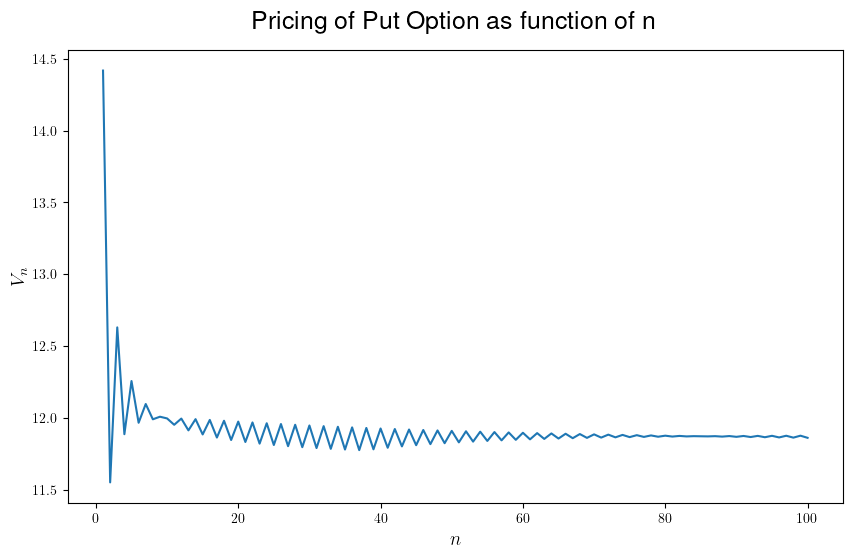

In [123]:
N_max = 100
prices = np.zeros(N_max)

for i in range(1, len(prices)+1):

    n = i
    U = np.exp(sigma*np.sqrt(T/n))
    D = 1/U
    ExerciseB = BinomialTree(100, U, D, periods = n)
    prices[i-1] = ExerciseB.priceEuropeanOption(K = 105, R = 0.05, optType='Put')
    
t = [i for i in range(1, N_max+1)];

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.figure(figsize=(10,6), dpi = 100)
plt.xlabel(r'$n$', fontsize = 14)
plt.ylabel(r'$V_{n}$', fontsize = 14)
plt.title("Pricing of Put Option as function of n", fontsize = 18, y=1.03)
plt.plot(t, prices);
plt.show()  

In [125]:
BlackScholes(S_t = 100, K = 105, t = 0, T = 1, sigma = sigma, r = 0.05, direction = "Put")

11.855971034759008

In [126]:
prices[-1]

11.860493112583496

## d)

In [127]:
sigma = 0.3
T = 1
n = 2
U = np.exp(sigma*np.sqrt(T/n))
D = 1/U

ExerciseD = BinomialTree(100, U, D, periods = n)
ExerciseD.priceAmericanOption(K = 105, R = 0.05, optType='Put', verbose = True);

It took 0.0s to price the options with a 2-period binomial model.
The price of the 'Put Option' is: 12.798016.


Loading…: 100%|██████████████████████████| 100/100 [00:01<00:00, 89.82it/s]


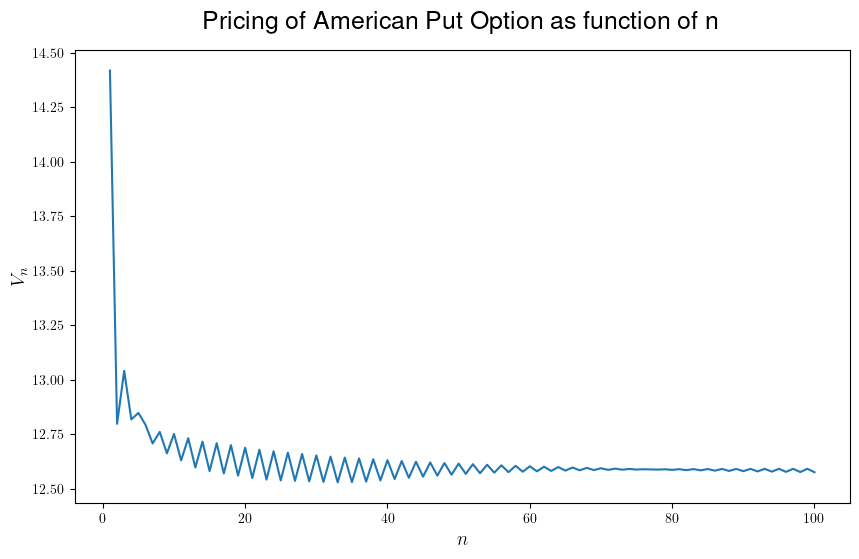

In [129]:
N_max = 100
prices = np.zeros(N_max)

for i in tqdm (range(1, len(prices)+1), desc="Loading…", ascii=False, ncols=75):

    n = i
    U = np.exp(sigma*np.sqrt(T/n))
    D = 1/U
    ExerciseD = BinomialTree(100, U, D, periods = n)
    prices[i-1] = ExerciseD.priceAmericanOption(K = 105, R = 0.05, optType='Put')
    
t = [i for i in range(1, N_max+1)];

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.figure(figsize=(10,6), dpi = 100)
plt.xlabel(r'$n$', fontsize = 14)
plt.ylabel(r'$V_{n}$', fontsize = 14)
plt.title("Pricing of American Put Option as function of n", fontsize = 18, y=1.03)
plt.plot(t, prices);
plt.show()  

## e) Asian Options ['Not part of exercises']

In [132]:
sigma = 0.3
T = 1
n = 2
U = np.exp(sigma*np.sqrt(T/n))
D = 1/U

ExerciseE = BinomialTree(100, U, D, periods = n)
ExerciseE.priceAsianOption(K = 105, R = 0.05, optType='Put', verbose = True);

It took 0.0s to price the options with a 2-period binomial model.
The price of the 'Put Option' is: 10.841821.


Loading…: 100%|████████████████████████████| 20/20 [00:12<00:00,  1.61it/s]


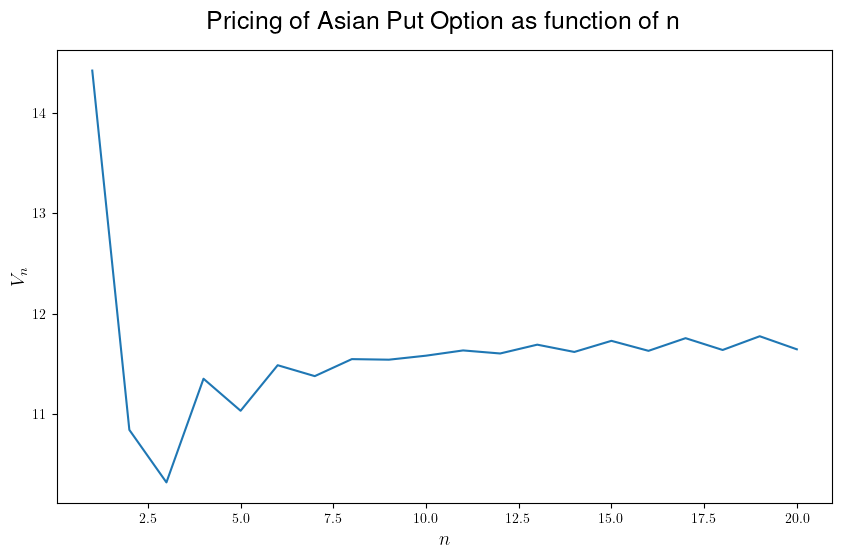

In [139]:
N_max = 20
prices = np.zeros(N_max)

for i in tqdm (range(1, len(prices)+1), desc="Loading…", ascii=False, ncols=75):

    n = i
    U = np.exp(sigma*np.sqrt(T/n))
    D = 1/U
    ExerciseE = BinomialTree(100, U, D, periods = n)
    prices[i-1] = ExerciseE.priceAsianOption(K = 105, R = 0.05, avgPeriod = n, optType='Put')
    
t = [i for i in range(1, N_max+1)];

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.figure(figsize=(10,6), dpi = 100)
plt.xlabel(r'$n$', fontsize = 14)
plt.ylabel(r'$V_{n}$', fontsize = 14)
plt.title("Pricing of Asian Put Option as function of n", fontsize = 18, y=1.03)
plt.plot(t, prices);
plt.show()  